In [40]:
year = 2023
day = 25

In [41]:
from aocd import submit
from aocd.models import Puzzle
from functools import reduce
import numpy as np

np.set_printoptions(edgeitems=30, linewidth=100000,
                    formatter=dict(float=lambda x: "%s" % x))

puzzle = Puzzle(year=year, day=day)
data = puzzle.input_data

data = data.strip()
data = data.replace(":", "")
data = data.split("\n")
# data = [list(map(int, d.replace("@", "").replace(",", "").split())) for d in data]
data = [d.split(" ") for d in data]
data = {d[0]: d[1:] for d in data}
data

{'mgz': ['mbb'],
 'bll': ['chq', 'kss'],
 'knv': ['vrs', 'gvd', 'hcf'],
 'lxq': ['kpc'],
 'dvn': ['sfp', 'rbx'],
 'gss': ['pfp', 'dts', 'hkg', 'rvr'],
 'bqv': ['mjc', 'bmn', 'jlt'],
 'txs': ['fpv', 'vrn'],
 'qpn': ['tvx'],
 'vlh': ['lns', 'vbx'],
 'hsd': ['rts', 'trh', 'kdz'],
 'crj': ['tml', 'qvk', 'zvj', 'jcb'],
 'dnt': ['bpc', 'vmz'],
 'hsv': ['hqp', 'fth', 'djt'],
 'tjq': ['grs', 'tpp', 'pzd', 'jkz'],
 'rbz': ['tbb', 'bcm', 'pjp', 'sgm'],
 'vfg': ['gjc', 'jnm', 'hzd', 'pdt'],
 'szg': ['fpt', 'qxc', 'dqv', 'jbp'],
 'vjx': ['dtk', 'lzz'],
 'kjj': ['kxb', 'cqs'],
 'hzs': ['clk', 'gdv'],
 'knq': ['hbk', 'nsm'],
 'dsp': ['kpj', 'frb', 'bck', 'tgv'],
 'clx': ['sfh', 'jnm'],
 'ncb': ['rhp', 'ghk'],
 'fth': ['fxm'],
 'vbl': ['vjh', 'jlt', 'rmf', 'kdh'],
 'hvb': ['gvn', 'zmk', 'hdp', 'nmf'],
 'fmp': ['ccn', 'fjn', 'mkd', 'nxh', 'pcz', 'clt'],
 'ktr': ['fxm', 'xgf'],
 'slr': ['dnz', 'dnt', 'dhz', 'ggm'],
 'ckf': ['vzc', 'fnv'],
 'pfh': ['sbx', 'hzf', 'vpp', 'dhm', 'dgh'],
 'mbk': ['kxb'],
 '

In [42]:
from collections import defaultdict
new_data = defaultdict(list)

for k, v in data.items():
    new_data[k].extend(v)
    for key in v:
        new_data[key].append(k)

new_data

defaultdict(list,
            {'mgz': ['mbb', 'ldf', 'hbp', 'xjj'],
             'mbb': ['mgz', 'zxq', 'dhn', 'jgq'],
             'bll': ['chq', 'kss', 'vqm', 'pdk'],
             'chq': ['bll', 'jbl', 'csz', 'dnk', 'cqh', 'rbc', 'mgm'],
             'kss': ['bll', 'fpd', 'rbd', 'vfz', 'dzh'],
             'knv': ['vrs', 'gvd', 'hcf', 'pjv'],
             'vrs': ['knv', 'lxf', 'nhp', 'ppg', 'hlv'],
             'gvd': ['knv', 'jlk', 'qbs', 'bbx', 'gsl', 'rcm', 'hpv'],
             'hcf': ['knv', 'vcn', 'bhz', 'jgq'],
             'lxq': ['kpc', 'xzb', 'hsg', 'mct', 'lcl'],
             'kpc': ['lxq', 'ttr', 'hzm', 'bhq', 'hzd', 'fgg'],
             'dvn': ['sfp', 'rbx', 'svp', 'mnq', 'bxp'],
             'sfp': ['dvn', 'hxs', 'zmk', 'vrf'],
             'rbx': ['dvn', 'pfr', 'gtr', 'gsq'],
             'gss': ['pfp', 'dts', 'hkg', 'rvr'],
             'pfp': ['gss', 'dmd', 'gmd', 'zqx'],
             'dts': ['gss', 'bck', 'szc', 'hzs', 'vpq'],
             'hkg': ['gss', 'mtz', 'vmz',

In [43]:
[len(v) for v in new_data.values() if len(v) == 3]

[]

In [44]:
%pip install networkx scipy


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [53]:
import networkx as nx
G = nx.Graph()
for k, v in new_data.items():
    G.add_node(k)
    for vv in v:
        G.add_edge(k, vv)

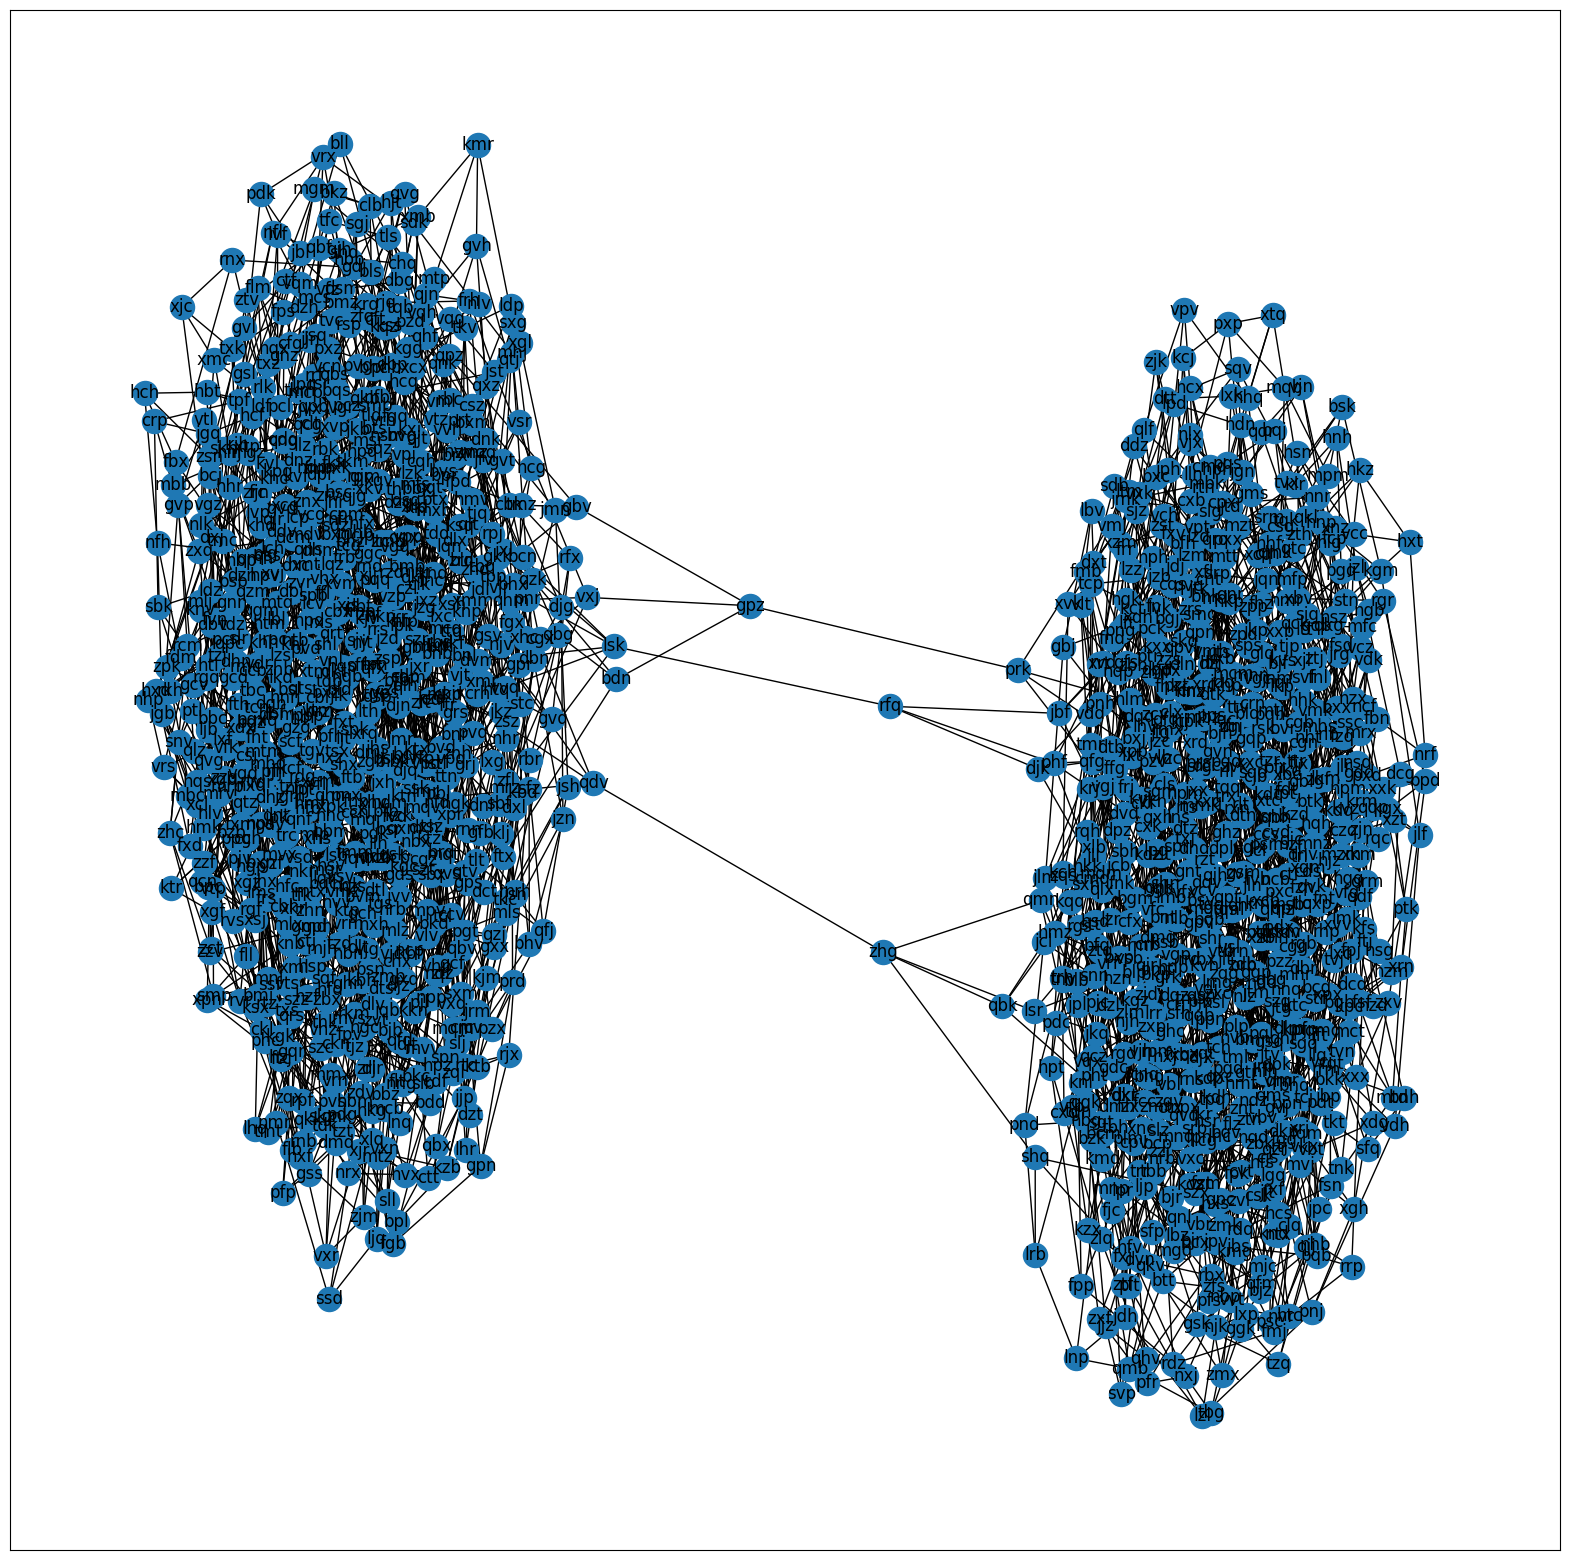

In [54]:
import math
import matplotlib.pyplot as plt
pos = nx.spring_layout(G, scale=5/math.sqrt(G.order()))
plt = plt.figure(figsize=(20, 20))
nx.draw_networkx(G, pos)
plt.savefig("graph.png", dpi=300)

In [55]:
links = [("rfq", "lsk"), ("prk", "gpz"), ("zhg", "qdv")]

In [56]:
for a, b in links:
    G.remove_edge(a, b)

In [57]:
sub_graphs = nx.connected_components(G)

In [58]:
import math
lens = []
for sub_graph in sub_graphs:
    # print(sub_graph)
    print(len(sub_graph))
    lens.append(len(sub_graph))

answer = math.prod(lens)

786
707


In [59]:
submit(answer, part="a", year=year, day=day)

Part a already solved with same answer: 555702
